## **Práctica 11: Pronóstico (Árbol de decisión)**

Nombre: Brandon Cervantes Rubí

No. Cuenta: 316136741

Email: mrkyloren117@gmail.com

### **Caso de estudio**

Estudios clínicos a partir de imágenes digitalizadas de pacientes con cáncer de mama de Wisconsin (WDBC, Wisconsin Diagnostic Breast Cancer)

**Objetivo.** Pronosticar el área del tumor de pacientes con cancer de mama a través de un árbol de decisión.

**Fuente de datos:**

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

#### **1) Importar las bibliotecas necesarias y los datos**

In [ ]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving WDBCOriginal.csv to WDBCOriginal.csv


{'WDBCOriginal.csv': b'\xef\xbb\xbfIDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension\r\nP-842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871\r\nP-842517,M,20.57,17.77,132.9,1326,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667\r\nP-84300903,M,19.69,21.25,130,1203,0.1096,0.1599,0.1974,0.1279,0.2069,0.05999\r\nP-84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744\r\nP-84358402,M,20.29,14.34,135.1,1297,0.1003,0.1328,0.198,0.1043,0.1809,0.05883\r\nP-843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,0.07613\r\nP-844359,M,18.25,19.98,119.6,1040,0.09463,0.109,0.1127,0.074,0.1794,0.05742\r\nP-84458202,M,13.71,20.83,90.2,577.9,0.1189,0.1645,0.09366,0.05985,0.2196,0.07451\r\nP-844981,M,13,21.82,87.5,519.8,0.1273,0.1932,0.1859,0.09353,0.235,0.07389\r\nP-84501001,M,12.46,24.04,83.97,475.9,0.1186,0.2396,0.2273,0.08543,0.203,0.08243\r\nP-845636,M,16.02,23.24,102.7,79

In [ ]:
BCancer = pd.read_csv('WDBCOriginal.csv')
BCancer 

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [ ]:
BCancer.describe()

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


#### **2) Gráfica del área del tumor por paciente**


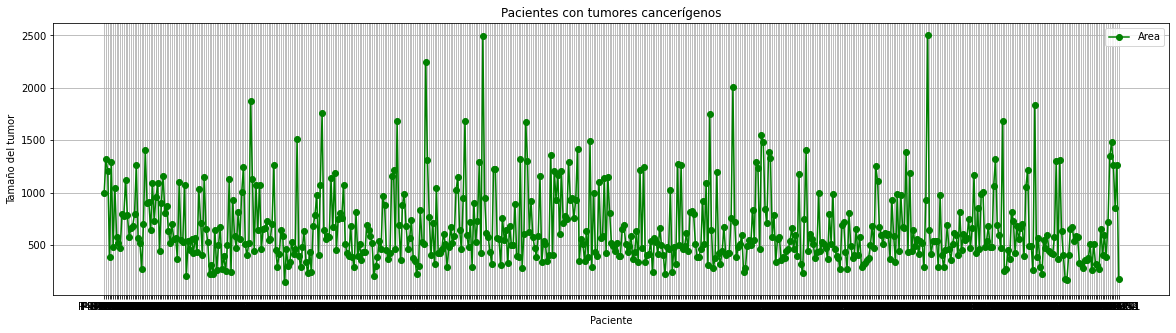

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(BCancer['IDNumber'], BCancer['Area'], color='green', marker='o', label='Area')
plt.xlabel('Paciente')
plt.ylabel('Tamaño del tumor')
plt.title('Pacientes con tumores cancerígenos')
plt.grid(True)
plt.legend()
plt.show()

#### **3) Selección de características**

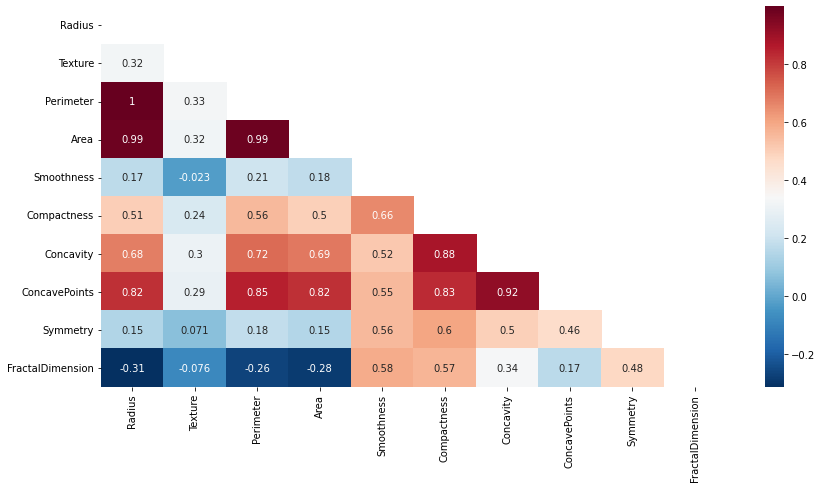

In [ ]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(BCancer.corr())
sns.heatmap(BCancer.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show() 

**Varibles seleccionadas:**

1) Textura [Posición 3]

2) Area [Posición 5]

3) Smoothness [Posición 6]

4) Compactness [Posición 7]

5) Symmetry [Posición 10]

6) FractalDimension [Posición 11]

*7) Perimeter [Posición 4] - Para calcular el área del tumor -

#### **4) Aplicación del algoritmo**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import model_selection

Se seleccionan las variables predictoras (X) y la variable a pronosticar (Y)

In [ ]:
X = np.array(BCancer[['Texture',
                      'Perimeter',
                      'Smoothness',	
                      'Compactness',	
                      'Symmetry',	
                      'FractalDimension']])
pd.DataFrame(X)

#Hay que probar con todas
#X = np.array(BCancer[['Radius', 'Texture', 'Perimeter', 'Smoothness', 'Compactness',	'Concavity', 'ConcavePoints', 'Symmetry',	'FractalDimension']
#pd.DataFrame(X)

,0,1,2,3,4,5
0,10.38,122.80,0.11840,0.27760,0.2419,0.07871
1,17.77,132.90,0.08474,0.07864,0.1812,0.05667
2,21.25,130.00,0.10960,0.15990,0.2069,0.05999
3,20.38,77.58,0.14250,0.28390,0.2597,0.09744
4,14.34,135.10,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...
564,22.39,142.00,0.11100,0.11590,0.1726,0.05623
565,28.25,131.20,0.09780,0.10340,0.1752,0.05533
566,28.08,108.30,0.08455,0.10230,0.1590,0.05648
567,29.33,140.10,0.11780,0.27700,0.2397,0.07016


In [ ]:
Y = np.array(BCancer[['Area']])
pd.DataFrame(Y)

,0
0,1001.0
1,1326.0
2,1203.0
3,386.1
4,1297.0
...,...
564,1479.0
565,1261.0
566,858.1
567,1265.0


Se hace la división de los datos

In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    test_size = 0.2, 
                                                                    random_state = 1234, 
                                                                    shuffle = True)

In [ ]:
pd.DataFrame(X_train)
#pd.DataFrame(X_test)

,0,1,2,3,4,5
0,18.22,84.45,0.12180,0.16610,0.1709,0.07253
1,22.44,71.49,0.09566,0.08194,0.2030,0.06552
2,20.76,82.15,0.09933,0.12090,0.1735,0.07070
3,23.84,82.69,0.11220,0.12620,0.1905,0.06590
4,18.32,66.82,0.08142,0.04462,0.2372,0.05768
...,...,...,...,...,...,...
450,15.18,88.99,0.09516,0.07688,0.2110,0.05853
451,15.10,141.30,0.10010,0.15150,0.1973,0.06183
452,18.60,81.09,0.09965,0.10580,0.1925,0.06373
453,18.70,120.30,0.11480,0.14850,0.2092,0.06310


In [ ]:
pd.DataFrame(Y_train)
#pd.DataFrame(Y_test)

,0
0,493.1
1,378.4
2,480.4
3,499.0
4,340.9
...,...
450,587.4
451,1386.0
452,481.9
453,1033.0


Se entrena el modelo a través de un Árbol de Decisión (Regresión)

In [ ]:
#PronosticoAD = DecisionTreeRegressor(random_state=0)
#= para guardad similitud en los datos
#PronosticoAD.fit(X_train, Y_train)

#MODIFICANDO LOS HIPERPARAMETROS (Probar con  minimo 8 elementos por hoja)
PronosticoAD = DecisionTreeRegressor(max_depth=5, min_samples_split=4, min_samples_leaf=2, random_state=0, criterion = "absolute_error")
#LA mitad de profundidad, por lo menos 2 hojas y minimo 4 elementos por hoja
PronosticoAD.fit(X_train, Y_train)
#PAra hacer poda y evitar sobreajuste

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=2, min_samples_split=4, random_state=0)

Se genera el pronóstico

In [ ]:
#Se genera el pronóstico
Y_Pronostico = PronosticoAD.predict(X_test)
pd.DataFrame(Y_Pronostico)

,0
0,412.70
1,337.70
2,508.30
3,245.75
4,583.75
...,...
109,412.70
110,1076.00
111,538.80
112,538.80


In [ ]:
Valores = pd.DataFrame(Y_test, Y_Pronostico)
Valores

,0
412.70,416.2
337.70,357.6
508.30,476.7
245.75,269.4
583.75,568.9
...,...
412.70,419.8
1076.00,1094.0
538.80,551.7
538.80,565.4


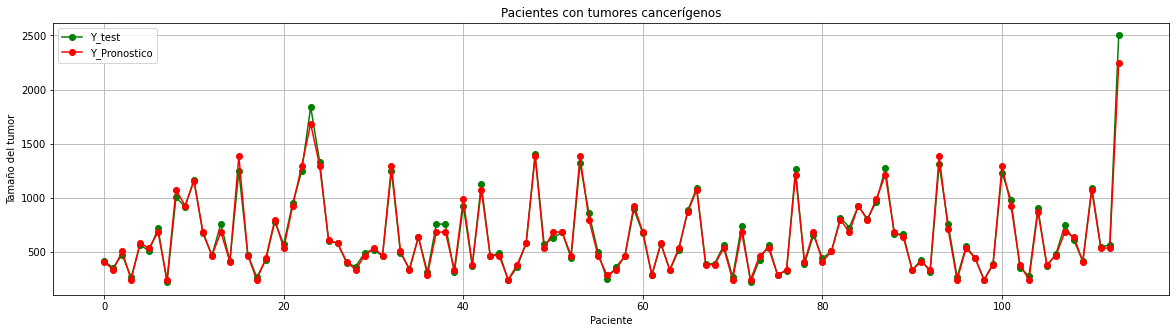

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(Y_test, color='green', marker='o', label='Y_test')
plt.plot(Y_Pronostico, color='red', marker='o', label='Y_Pronostico')
plt.xlabel('Paciente')
plt.ylabel('Tamaño del tumor')
plt.title('Pacientes con tumores cancerígenos')
plt.grid(True)
plt.legend()
plt.show()
#Probando con los datos de prueba{#Hay tendencia para un sobreajuste}

In [ ]:
r2_score(Y_test, Y_Pronostico)
#Reduciendo la profundidad podemos generalizar mas
#Profundidad con 4 elementos en las hojas y minimo 2 nodos
# 8: 0.9918
# 7: 0.9895
# 9: 0.9921
# 6: 0.9886
# 5: 0.9844

0.9857308957615053

#### **5) Obtención de los parámetros del modelo**

In [ ]:
print('Criterio: \n', PronosticoAD.criterion)
print('Importancia variables: \n', PronosticoAD.feature_importances_)
print("MAE: %.4f" % mean_absolute_error(Y_test, Y_Pronostico))
print("MSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico))
print("RMSE: %.4f" % mean_squared_error(Y_test, Y_Pronostico, squared=False))   #True devuelve MSE, False devuelve RMSE
print('Score: %.4f' % r2_score(Y_test, Y_Pronostico))

Criterio: 
 squared_error
Importancia variables: 
 [0.         0.99860669 0.         0.00139331 0.         0.        ]
MAE: 29.1341
MSE: 2075.7239
RMSE: 45.5601
Score: 0.9845


In [ ]:
Importancia = pd.DataFrame({'Variable': list(BCancer[['Texture', 'Perimeter', 'Smoothness',	
                                            'Compactness', 'Symmetry', 'FractalDimension']]),
                            'Importancia': PronosticoAD.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia
#La variable que tiene mas entropia es el perimetro

,Variable,Importancia
1,Perimeter,0.998607
3,Compactness,0.001393
0,Texture,0.000000
2,Smoothness,0.000000
4,Symmetry,0.000000
5,FractalDimension,0.000000


#### **6) Conformación del modelo de pronóstico**

* El error absoluto medio (MAE) del algoritmo es 17.1, que es alrededor de 2.7% de la media de todos los valores de la variable 'Area' (654.88). Esto significa que el algoritmo realiza un notable pronóstico.

* Además, se tiene un Score de 0.9954, el cual indica que el pronóstico del Area del tumor se logrará con un 99% de efectividad.

* Por otro lado, los pronósticos del modelo final se alejan en promedio 24.84 (RMSE) unidades del valor real.


In [ ]:
!pip install graphviz

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

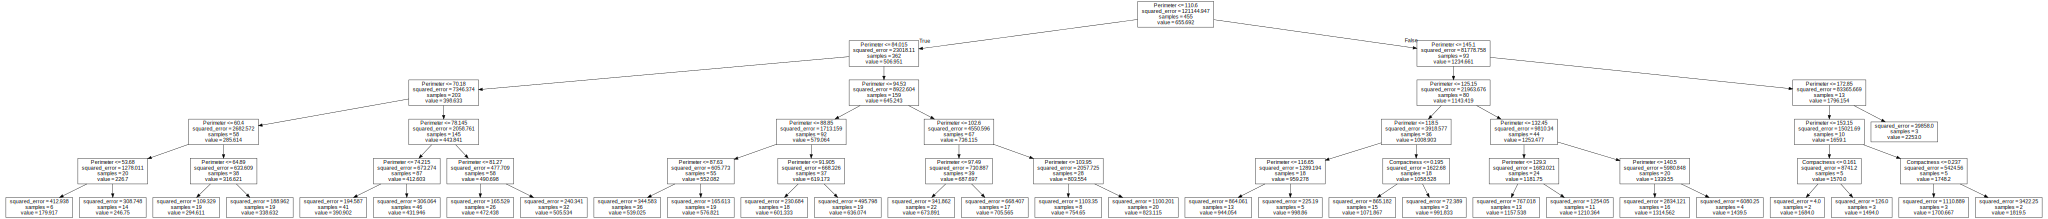

In [ ]:
# Se crea un objeto para visualizar el árbol
# Se incluyen los nombres de las variables para imprimirlos en el árbol
Elementos = export_graphviz(PronosticoAD, feature_names = ['Texture', 'Perimeter', 'Smoothness', 
                                                           'Compactness', 'Symmetry', 'FractalDimension'])  
Arbol = graphviz.Source(Elementos)
Arbol
#Se miden las diferencias con respecto a la media

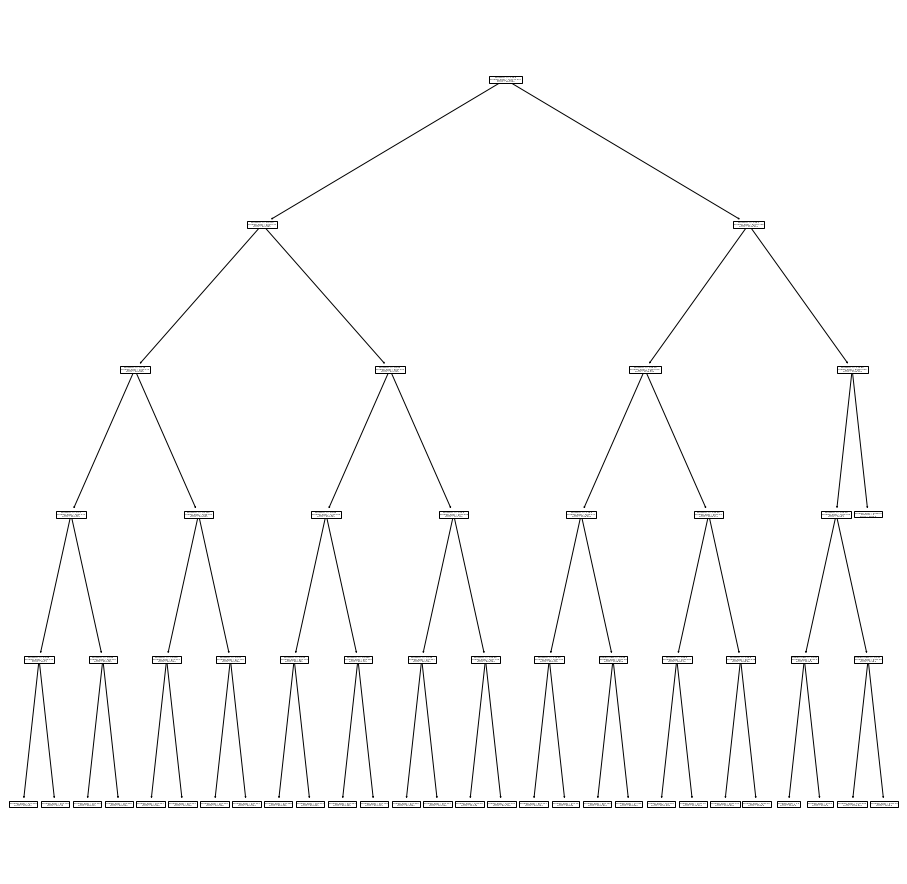

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(PronosticoAD, feature_names = ['Texture', 'Perimeter', 'Smoothness', 
                                         'Compactness', 'Symmetry', 'FractalDimension'])
plt.show()

In [ ]:
from sklearn.tree import export_text
Reporte = export_text(PronosticoAD, feature_names = ['Texture', 'Perimeter', 'Smoothness', 
                                                     'Compactness', 'Symmetry', 'FractalDimension'])
#Generacion de las reglas de inferencia
print(Reporte)
#Para generalizar mas hay que hacer poda cortando aquellos nodods hoja que no cumplan con una condicion
#Heuristica 50%, 60%, 70%
#Cuando se generan muchas reglas (Que el arbol este muy profundo) se cae en sobreajuste

|--- Perimeter <= 110.60
|   |--- Perimeter <= 84.01
|   |   |--- Perimeter <= 70.18
|   |   |   |--- Perimeter <= 60.40
|   |   |   |   |--- Perimeter <= 53.68
|   |   |   |   |   |--- value: [179.92]
|   |   |   |   |--- Perimeter >  53.68
|   |   |   |   |   |--- value: [246.75]
|   |   |   |--- Perimeter >  60.40
|   |   |   |   |--- Perimeter <= 64.89
|   |   |   |   |   |--- value: [294.61]
|   |   |   |   |--- Perimeter >  64.89
|   |   |   |   |   |--- value: [338.63]
|   |   |--- Perimeter >  70.18
|   |   |   |--- Perimeter <= 78.15
|   |   |   |   |--- Perimeter <= 74.22
|   |   |   |   |   |--- value: [390.90]
|   |   |   |   |--- Perimeter >  74.22
|   |   |   |   |   |--- value: [431.95]
|   |   |   |--- Perimeter >  78.15
|   |   |   |   |--- Perimeter <= 81.27
|   |   |   |   |   |--- value: [472.44]
|   |   |   |   |--- Perimeter >  81.27
|   |   |   |   |   |--- value: [505.53]
|   |--- Perimeter >  84.01
|   |   |--- Perimeter <= 94.53
|   |   |   |--- Perimeter <= 8

La imagen del árbol es grande, pero se puede leer en el siguiente orden:

1. La decisión que se toma para dividir el nodo.
2. El tipo de criterio que se usó para dividir cada nodo.
3. Cuantos valores tiene ese nodo.
4. Valores promedio.
5. Por último, el valor pronosticado en ese nodo.

#### **7) Nuevos pronósticos**

In [ ]:
AreaTumorID1 = pd.DataFrame({'Texture': [10.38], 
                             'Perimeter': [120.8], 
                             'Smoothness': [0.11840], 
                             'Compactness': [0.27760], 
                             'Symmetry': [0.2419], 
                             'FractalDimension': [0.07871]})
PronosticoAD.predict(AreaTumorID1)

#El arbol se tiene mejores resultados que la regresion convencional por 1%. Ya que traban mejor con datos que no son linealmente separables
#En conclusion es un buen modelo sin caer en sobreajuste. El aprensizaje se encuentra en la division que hacen los nodos intermedios.
#Estamos trabajando con la media, si hubieramos puesto la mediana el arbol cambiaria (absolute_error), hay que cambiar el criterio de separacion, 
#varia una centesima o una milesima (Da una presiocion de 0.9857)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([991.83333333])